In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random



In [23]:
#read data
df=pd.read_csv('IrisData.txt')
%run Tkinter_task_3.ipynb

Bias:  0
Number of hidden layers:  1

Learning rate:  4

Learning rate:  0.2

Number of epochs:  1000

selected function: 1


In [24]:
def sigmoid(net):
    res = 1/(1+np.exp(-net))
    return res

In [25]:
def tanh(net):
    res = np.tanh(net)
    return res

In [26]:
def derv(net):
    if act_fun==1:
        
        z=net*(1-net)
        
    else:
        
        z=(1-net)*(1+net)
    return z    
    
    
    
    

In [27]:
def init_weights():
    weights_list=[]
    input_weights = np.random.rand(int(number_neurons[0]),4+b)

    weights_list.append(input_weights)


    for i in range (hidden_layers-1):
        weights = np.random.rand(int(number_neurons[i+1]),int(number_neurons[i]+b))
        weights_list.append(weights)
    
    output_weights = np.random.rand(3,int(number_neurons[hidden_layers-1]+b))
    weights_list.append(output_weights)
    return weights_list

In [28]:
def calculate_net(inputs,w):
    
    res = np.dot(inputs,w.T)
    
    if act_fun == 1:
        
        fnet = sigmoid(res)
    
    elif act_fun == 2:
       
        fnet = tanh(res)
    
    return fnet

In [29]:
def confusion_matrix(predict,actual):
    totalp=0 
    totaln=0 
    
    tseto_seto=0      #prediction: setosa , actual: setosa
    tseto_vers=0      #prediction: setosa , actual: versicolor
    tseto_virg=0      
    #p    #a
    tvers_vers=0
    tvers_virg=0
    tvers_seto=0
    
    tvirg_virg=0
    tvirg_vers=0
    tvirg_seto=0
    

    for i,j in zip(predict, actual):
        
        
        if i == j:
            if (i ==0):
                tseto_seto+=1
                
            elif (i ==1):
                tvers_vers+=1
            
            elif (i ==2):
                tvirg_virg+=1
                
        elif j == 0:
            if(i == 1):
                tseto_vers+=1
            else:
                tseto_virg+=1
                
        elif j == 1:
            if(i == 0):
                tvers_seto+=1
            else:
                tvers_virg+=1
                
        elif j == 2:
            if(i == 0):
                tvirg_seto+=1
            else:
                tvirg_vers+=1
                
    accuracy = (tseto_seto+tvers_vers+tvirg_virg)/len(predict)
    import seaborn as sn
    arr=[[tseto_seto,tseto_vers,tseto_virg] , [tvers_seto,tvers_vers,tvers_virg] , [tvirg_seto,tvirg_vers,tvirg_virg]]


    conv=pd.DataFrame(arr)

# renaming the DataFrame columns
    conv.columns = ['Iris-seto', 'Ires-vers','Ires-virg']
    conv.index=['Iris-seto', 'Ires-vers','Ires-virg']
    plt.figure()
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(conv, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu') # font size

                           
    print("Accuracy:",accuracy*100,"%")
    plt.show() 

In [30]:
#check selected features
act_fun = sele_f.get()


#check bias, learning rate and epochs
if check_var.get()==1:
    b=1
else: 
    b=0

#convert from string 
hidden_layers=int(hl)

number_neurons=str(nn)
number_neurons = number_neurons.strip('\n')
number_neurons = number_neurons.split(",")

number_neurons=list(map(int, number_neurons))



lr=float(lr)
epochs=int(epochs)

In [31]:
#Train_Test_split

df_train1=df.iloc[0:30,:]
df_train2=df.iloc[50:80,:]
df_train3=df.iloc[100:130,:]
df_train=pd.concat([df_train1, df_train2,df_train3])
df_train=df_train.reset_index(drop=True)

df_test1=df.iloc[30:50,:]
df_test2=df.iloc[80:100,:]
df_test3=df.iloc[130:150,:]
df_test=pd.concat([df_test1, df_test2,df_test3])
df_test=df_test.reset_index(drop=True)


#shuffle data -> better training
df_train=df_train.sample(frac=1,random_state=42).reset_index(drop=True)
df_test=df_test.sample(frac=1,random_state=42).reset_index(drop=True)



#Train-Test split
x_train=df_train.iloc[:,:4]
y_train=df_train.iloc[:,-1]
x_test=df_test.iloc[:,:4]
y_test=df_test.iloc[:,-1]

y_train=y_train.values


In [32]:
y_train
y_train=pd.get_dummies(y_train)


In [33]:
##### TRAIN #####
def MLP():
    if b == 1:
        x_train_b = np.append(np.ones((x_train.shape[0],1)),x_train,axis = 1)
        net = x_train_b
        m=x_train_b
    else:
        net = x_train
        m=x_train
        m=m.to_numpy()
        net=net.to_numpy()
    y=y_train
    y=y.to_numpy()
    
    weights_list=init_weights() #initialize weights randomly


    for i in range (epochs):
        
        ypred_train=np.zeros((90,3))
        for j in range (m.shape[0]):  #no. of rows
            
            error_list=[]     #list of error signals
            list_nets=[]      #list of inputs
            backprop_list=[]  #list of error signals without bias
            der=[]            #derivatives
            
            #### FORWARD PROPAGATION ###
            for k in range (0, hidden_layers+1):
                if k==0:
                    net=m[j]
                    list_nets.append(net)
                    net = calculate_net(net, weights_list[k])
                else:
                    if b==1:
                        net=net.reshape(1,-1)
                        net = np.append(np.ones((1,1)),net,axis = 1)
                    der.append(derv(net))
                    list_nets.append(net)
                    net=net.reshape(1,-1)    
                    net = calculate_net(net, weights_list[k])          
            list_nets.append(net)
            der.append(derv(net))
            ypred_train[j]=net     
            
            
            
            #### BACKWARD PROPAGATION ###
            z=derv(list_nets[hidden_layers+1])
            error=(y[j]-list_nets[hidden_layers+1])*z    #error signal of output layer
            error_list.append(error)
            backprop_list.append(error)                  #output layer -> no bias   
            for bk in range(hidden_layers-1,-1,-1) :
 
                if bk==hidden_layers-1:
                    error=der[bk]*np.dot(error_list[-1],weights_list[bk+1])
                else:
                    if b==1:
                        error=der[bk]*np.dot(backprop_list[-1],weights_list[bk+1])
                    else:
                        error=der[bk]*np.dot(error_list[-1],weights_list[bk+1])
                error_list.append(error)  
                backprop_list.append(error[:,1:])      #remove bias error
                
            ##### WEIGHTS UPDATE #####
            for up in range (0, hidden_layers+1):
         
                if b==1:
               
                    weights_list[up]=weights_list[up]+lr*(backprop_list[-1].reshape(-1,1))*list_nets[up]
                    backprop_list.pop()      #update using error without bias of next layer
                else:
                    weights_list[up]=weights_list[up]+lr*(error_list[-1].reshape(-1,1))*list_nets[up]
                    error_list.pop()        #update normally
                    
    return weights_list,ypred_train                    

In [34]:
##### TEST #####
def testing_phase(x_test,weights_list):
    ypred_test=np.zeros((60,3))
    if b==1:
        x_test=np.append(np.ones((x_test.shape[0],1)),x_test,axis = 1)
    for j in range (x_test.shape[0]):



        net =calculate_net(x_test[j], weights_list[0])

        for k in range (1 , hidden_layers+1):

            if b==1:

                net=net.reshape(1,-1)
                net = np.append(np.ones((1,1)),net,axis = 1)


            net=net.reshape(1,-1)
 
            net = calculate_net(net, weights_list[k])

        ypred_test[j]=net


    x_test.shape
    ypred_test.shape
    return ypred_test

In [35]:
 weights_list,ypred_train=MLP()

In [36]:
test_nets=[]
x_test=x_test.to_numpy()
ypred_test=testing_phase(x_test,weights_list)


In [37]:
ypred_test=pd.DataFrame(ypred_test)
ypred_train=pd.DataFrame(ypred_train)
ypred_test=ypred_test.eq(ypred_test.where(ypred_test != 0).max(1), axis=0).astype(int)
ypred_train=ypred_train.eq(ypred_train.where(ypred_train != 0).max(1), axis=0).astype(int)




In [38]:


x=ypred_train.iloc[:,:2].values
y=y_train.iloc[:,:2].values

ypred_train_np = np.array(ypred_train)
y_train_np = np.array(y_train)

ypred_train_label = []           #1 column with label for each class -> to calculate accuracy
y_train_label = []

for i in range (y_train.shape[0]):
    
    ypred_train_label.append(np.argmax(ypred_train_np[i]))     #get label of the positive class  
    y_train_label.append(np.argmax(y_train_np[i]))
    
print(ypred_train_label)
print("\n ------------------------------------------------------------------------------------")
print(y_train_label)




[1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 2, 0, 1]

 ------------------------------------------------------------------------------------
[1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1]


In [39]:

y_test=pd.get_dummies(y_test)


In [40]:
ypred_test_np = np.array(ypred_test)

y_test_np = np.array(y_test)


ypred_test_label = []
y_test_label = []                      #1 column with label for each class -> to calculate accuracy

for i in range (y_test.shape[0]):        
    
    ypred_test_label.append(np.argmax(ypred_test_np[i]))    #get label of the positive class  
    y_test_label.append(np.argmax(y_test_np[i]))
    



Accuracy: 94.44444444444444 %


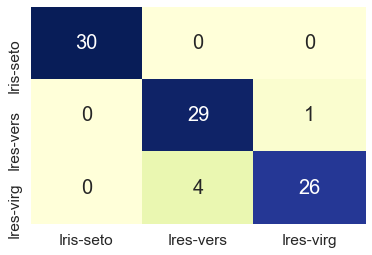

In [41]:
confusion_matrix(ypred_train_label,y_train_label)

Accuracy: 98.33333333333333 %


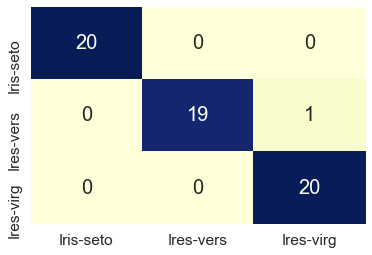

In [42]:
confusion_matrix(ypred_test_label,y_test_label)